# Explore Wagga Exposure Data


In [1]:
import geopandas as gpd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#Wagga file
filepath = '/Users/Fangyuan/FrontierSI/Projects - Documents/Projects - Data Analytics/127 Residential Dwelling Floor Height/4 Executing/GA_data_documentation/Wagga Exposure Data/Wagga_Building_Estimated_Levels.zip'

Wagga data coluns
['X', 'Y', 'Residental', 'Storeys', 'Ground_Lev', 'Floor_Leve', 'Street',
       'geometry']

/Users/Fangyuan/miniconda/envs/geo/lib/python3.9/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Axes: ylabel='Frequency'>

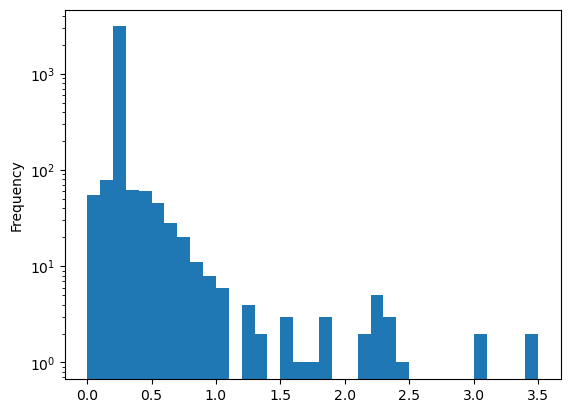

In [3]:
df = gpd.read_file(filepath)
df_r = df[df.Residental=='R']
df_r['Floor_Height'] = df_r.Floor_Leve - df_r.Ground_Lev

df_r.Floor_Height.plot.hist(bins=np.arange(0,df_r.Floor_Height.max()+0.1,0.1), logy=True)

# of Multiples of 0.28: 3018
483


<Axes: ylabel='Frequency'>

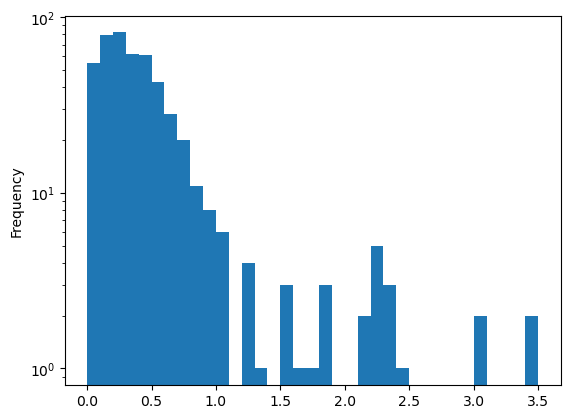

In [4]:
multiples = np.isclose(df_r.Floor_Height.values, 0.28, atol=1e-3)
for i in np.arange(2, df_r.Floor_Height.max()/0.28+1):
    multiples = multiples | np.isclose(df_r.Floor_Height.values, 0.28*i, atol=1e-3)

print("# of Multiples of 0.28:",multiples.sum())
df_surveyed = df_r[~multiples]
print(len(df_surveyed))
df_surveyed.Floor_Height.plot.hist(bins=np.arange(0,df_r.Floor_Height.max()+0.1,0.1), logy=True)


Text(0.5, 0, 'Floor height')

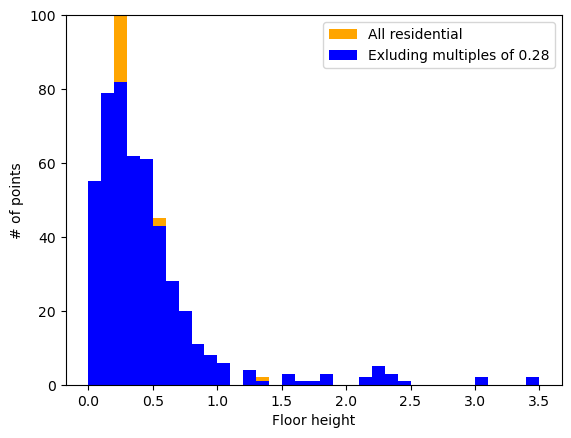

In [5]:
bins=np.arange(0,df_r.Floor_Height.max()+0.1,0.1)
logy=False
df_r.Floor_Height.plot.hist(bins=bins, logy=logy,density=False, color='orange',label='All residential')
df_surveyed.Floor_Height.plot.hist(bins=bins, logy=logy, density=False, color='blue', label='Exluding multiples of 0.28')

plt.ylim(0,100)
plt.legend()
plt.ylabel('# of points')
plt.xlabel('Floor height')

In [7]:
df_surveyed.to_file('Wagga_Building_Estimated_Levels_Surveyed.geojson', driver='GeoJSON')